In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# Abrir el archivo FITS
hdul = fits.open("tess2021258175143-s0043-0000000017308640-0214-s_lc.fits")


hdul.info()
data = hdul[1].data

print("Columnas disponibles:")
print(data.columns.names)

Filename: tess2021258175143-s0043-0000000017308640-0214-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   17804R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
Columnas disponibles:
['TIME', 'TIMECORR', 'CADENCENO', 'SAP_FLUX', 'SAP_FLUX_ERR', 'SAP_BKG', 'SAP_BKG_ERR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'QUALITY', 'PSF_CENTR1', 'PSF_CENTR1_ERR', 'PSF_CENTR2', 'PSF_CENTR2_ERR', 'MOM_CENTR1', 'MOM_CENTR1_ERR', 'MOM_CENTR2', 'MOM_CENTR2_ERR', 'POS_CORR1', 'POS_CORR2']


In [20]:
Tiempo = data["TIME"]
print(Tiempo)

Flujo_rad = data["PDCSAP_FLUX"]
print(Flujo_rad)

print(np.isnan(Flujo_rad).sum(), "NaN en FLUX de", len(Flujo_rad))

#Hora del masking

Datos_limpios = (~np.isnan(Tiempo)) & (~np.isnan(Flujo_rad))

Tiempo_L = Tiempo[Datos_limpios]
Flujo_L = Flujo_rad[Datos_limpios]

print(len(Tiempo_L))
print(len(Flujo_L))


[2474.163564   2474.16495303 2474.16634205 ... 2498.88927334 2498.89066233
 2498.89205131]
[nan nan nan ... nan nan nan]
2107 NaN en FLUX de 17804
15697
15697


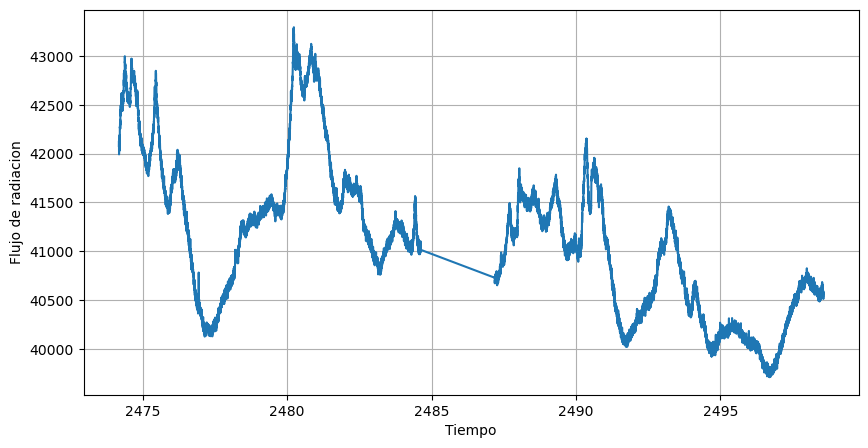

In [21]:
plt.figure(figsize=(10,5))
plt.plot(Tiempo_L, Flujo_L)
plt.xlabel("Tiempo")
plt.ylabel("Flujo de radiacion")
plt.grid(True)
plt.show()